## Import Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_wine

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

In [3]:
warnings.filterwarnings("ignore")

## Feature Selection

### 1. Filter Method

#### 1.1 Correlation Method

In [4]:
df = pd.read_csv("Boston_HPP.csv")

In [5]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
df = df.drop("Unnamed: 0", axis = 1)

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<Axes: >

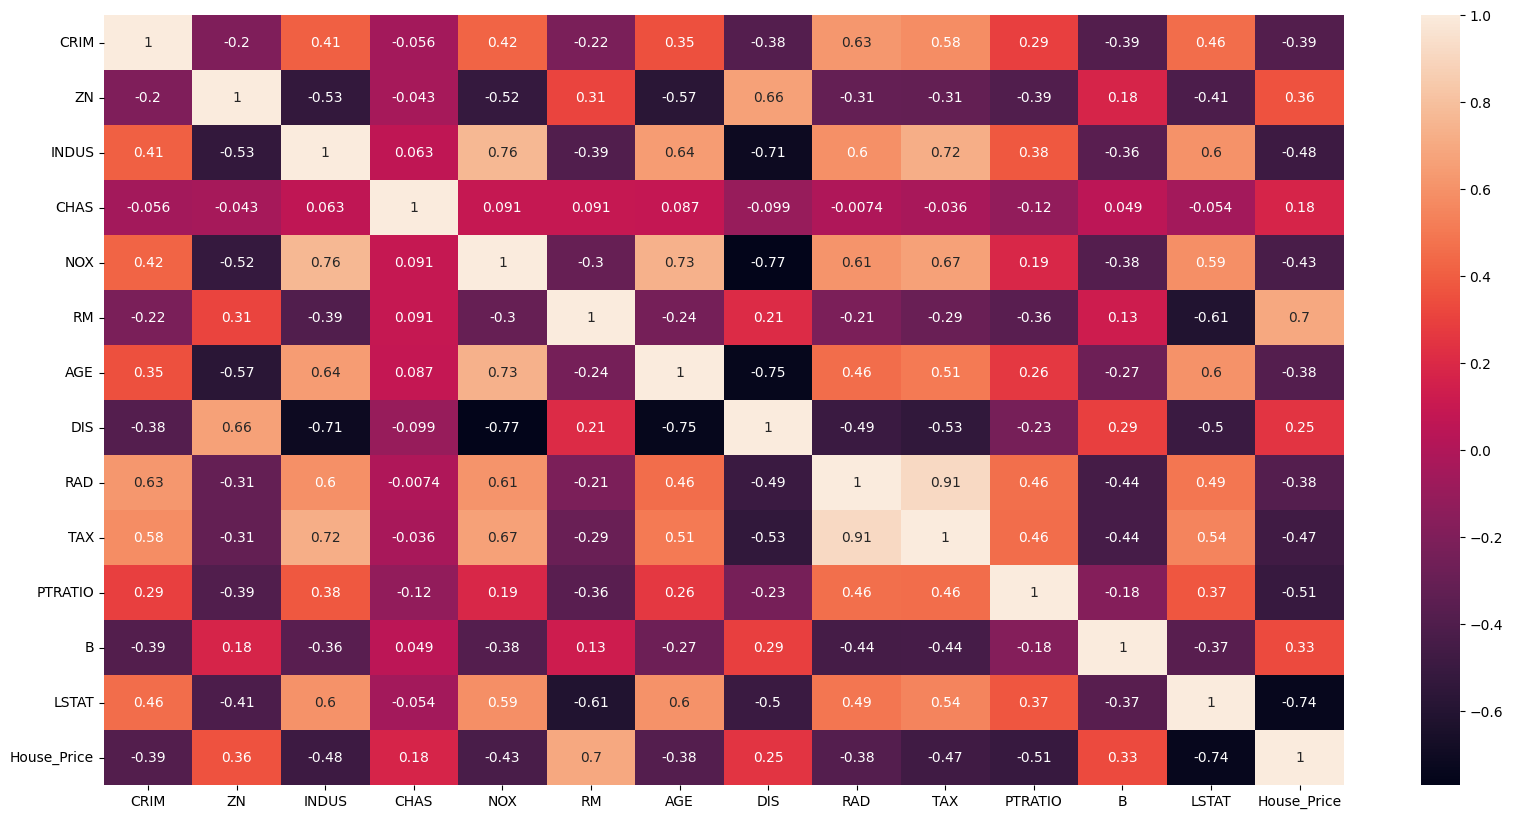

In [8]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot = True)

In [9]:
# It gives the correlation for each columns

### Pearson Method (both columns are numeric)

<Axes: >

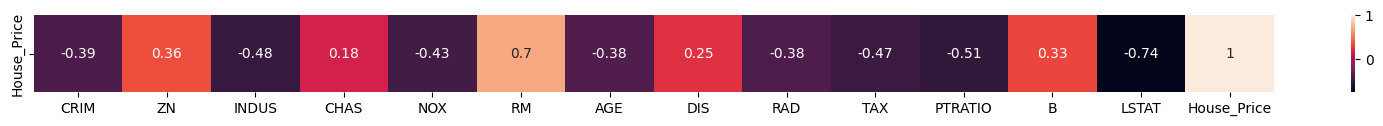

In [10]:
# We just need correlation of hiuse_price with other columns only
corr = df.corr().tail(1)
plt.figure(figsize = (20,1))
sns.heatmap(corr, annot = True)

### Spearman Method (both columns are numeric)

<Axes: >

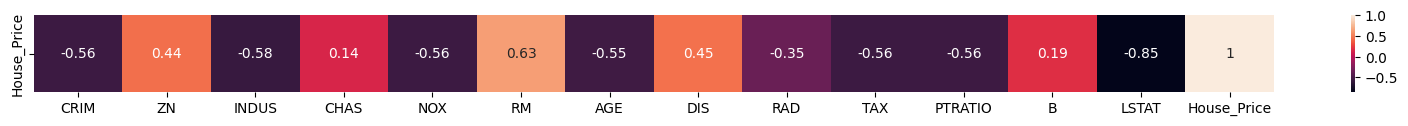

In [11]:
corr = df.corr(method="spearman").tail(1)
plt.figure(figsize = (20,1))
sns.heatmap(corr, annot = True)

<Axes: >

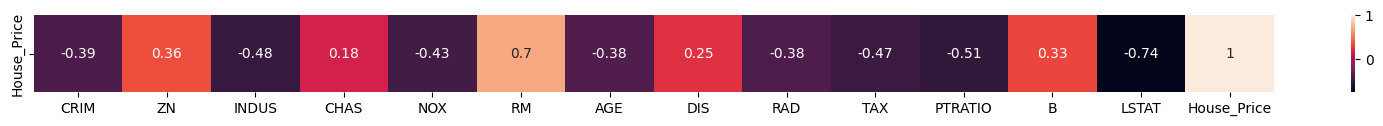

In [12]:
corr = df.corr().tail(1)
plt.figure(figsize = (20,1))
sns.heatmap(corr, annot = True)

### Kendall Method  (out of the two columns one is categorical and other is numeric)

<Axes: >

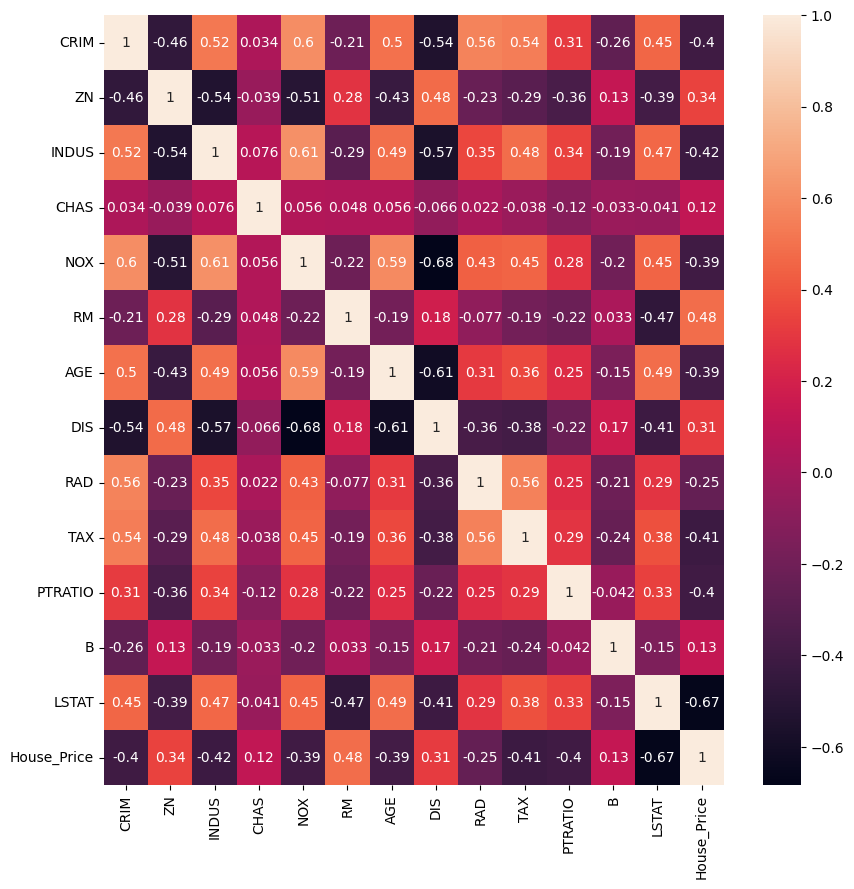

In [13]:
## Kendall Method
corr = df.corr(method="kendall")
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot = True)

<Axes: >

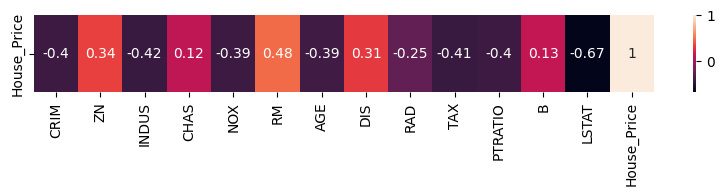

In [14]:
## Kendall Method
corr = df.corr(method="kendall").tail(1)
plt.figure(figsize = (10,1))
sns.heatmap(corr, annot = True)

### 1.2 Fisher's Score

In [15]:
# !pip install skfeature-chappers

In [16]:
from skfeature.function.similarity_based import fisher_score

In [17]:
data_dict_wine = load_wine()

In [18]:
wine_df = pd.DataFrame(data = data_dict_wine.data, columns = data_dict_wine.feature_names)

In [19]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [20]:
wine_df["target"] = data_dict_wine.target

In [21]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [22]:
wine_df["target"].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

In [23]:
x = wine_df.drop("target", axis = 1)
y = wine_df["target"]

In [24]:
x.shape

(178, 13)

In [27]:
fisher_rank = fisher_score.fisher_score(x.to_numpy(), y.to_numpy())

In [29]:
fisher_rank

array([ 6,  0,  1, 12,  3,  2,  7, 11,  9,  4,  5, 10,  8])

<Axes: >

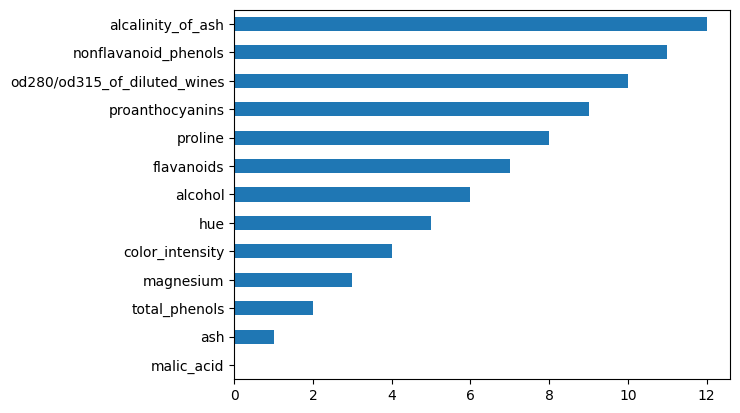

In [30]:
series_fisher_rank = pd.Series(fisher_rank, index = x.columns)
series_fisher_rank.sort_values().plot(kind = "barh")

In [35]:
x = df.drop("House_Price", axis = 1)
y = df["House_Price"]

<Axes: >

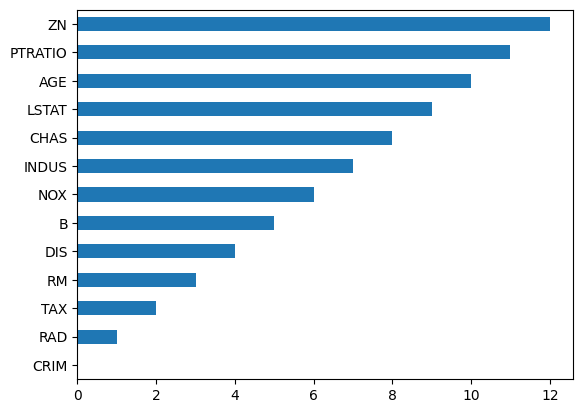

In [38]:
fisher_rank = fisher_score.fisher_score(x.to_numpy(),y.to_numpy())
series_fisher_rank = pd.Series(fisher_rank, index = x.columns)
series_fisher_rank.sort_values().plot(kind = "barh")